# **1. 파이토치**
PyTorch는 파이썬 기반의 오픈소스 딥러닝 프레임워크로, 파이썬 코드로 AI 모델을 직관적으로 만들고 학습할 수 있도록 도와주는 도구입니다. 특히 동적 계산 그래프 방식을 사용하기 때문에 코드 실행 시점에 실시간으로 계산 흐름이 결정되어 디버깅과 수정이 쉽고, GPU 가속과 자동 미분 기능을 통해 대규모 모델도 빠르게 학습할 수 있습니다.



### ※ 동적 계산 그래프 방식

딥러닝 모델이 학습 및 예측을 수행할 때 계산 그래프를 실행 시점(runtime)에 실시간으로 생성 및 수정하는 방식입니다. 이 방식은 조건문, 반복문 등 복잡한 논리 구조를 유연하게 처리할 수 있으며, 주로 PyTorch와 같은 프레임워크에서 사용됩니다. 계산 그래프는 입력 데이터를 바탕으로 연산을 수행하면서 그래프를 생성하고, 역전파를 통해 미분을 계산하며, 최종적으로 가중치를 업데이트하는 과정을 거칩니다. 이러한 특성 덕분에 디버깅이 용이하고 연구 및 개발 속도가 빠르며 직관적인 코드 작성이 가능합니다.  

쉽게 얘기하면~   
* 동적 계산 그래프 = 코드가 한 줄씩 실행될 때마다 그 순간의 “연산 흐름”을 즉석에서 점·선으로 기록하는 방식

| 항목        | PyTorch (동적 그래프)                       | TensorFlow 1.x (정적 그래프)                             |
| --------- | -------------------------------------- | --------------------------------------------------- |
| 그래프 생성 시점 | 연산할 때마다 즉석에서 그리기<br>“레고 블록 쌓으며 도면 스케치” | 먼저 전체 도면을 완성한 뒤<br>“비행기 조립 전에 매뉴얼 다 그려놓기”           |
| 코드 스타일    | 파이썬 순서대로 작성 → 바로 실행                    | 그래프 정의(빌드) → 세션 실행(Session.run)                     |
| 디버깅       | 중간값 바로 찍어보고<br>에러 위치 즉시 확인 가능          | 전체 그래프 컴파일 후 에러 → 어디서 잘못됐는지 추적 번거로움                 |
| 유연한 분기·반복 | `if`·`for`문 자연스럽게 사용 가능                | 분기·반복을 그래프 레벨로 구현하거나<br>`tf.while_loop` 등 별도 API 필요 |
| 실행 속도     | 개발·디버깅 단계에선 빠름<br>추가 최적화를 직접 해야 함      | 한번 컴파일된 그래프는 반복 실행 시 더 빠르고 최적화됨                     |
| 배포·서빙     | TorchScript 등 별도 변환 필요                 | `SavedModel` 포맷으로 그래프 통째로 바로 배포 용이                  |


> PyTorch:
“레고 블록 하나씩 쌓을 때마다 도면을 즉석에서 그려보면서 조립”

> TensorFlow 1.x:
“출발 전 비행기를 어떻게 조립할지 매뉴얼을 완벽하게 다 작성해 둔 뒤, 그 매뉴얼대로 조립”



## 1. 스칼라

스칼라(Scalar)는 단 하나의 숫자(정수, 실수 등)만을 담는 자료형을 말합니다.
- 파이토치(PyTorch)에서 스칼라는 0차원 텐서(0-dimensional Tensor)로 표현합니다.
- 즉, 텐서의 차원(Shape)이 전혀 없는 상태를 의미합니다.

In [2]:
import torch

var1 = torch.tensor(5)
print(var1)
print(var1.shape)       # torch.Size([]) -> 0차원 텐서
print("====================================")
var2 = torch.tensor([10])
print(var2)
print(var2.shape)       # torch.Size([1]) -> 1차원 텐서. 스칼라가 아님 값이 하나 들어있다.
print("====================================")
var3 = torch.tensor(3)
result = var1 + var3
print(result)        # tensor(8)
print(result.item()) # 8 -> 텐서 값(스칼라)을 파이썬 숫자로 추출함
print("====================================")
result2 = var2 + var3
print(result2)       # tensor(13) -> 차원이 달라도 연산은 됨 (1차원 텐서로 변환)
print(result2.item())

tensor(5)
torch.Size([])
tensor([10])
torch.Size([1])
tensor(8)
8
tensor([13])
13


### 2. 벡터(Vector)

벡터(Vector)는 하나 이상의 원소가 일렬로 나열된 1차원 텐서(1D Tensor)를 의미합니다.  
- 파이토치(PyTorch)에서 벡터는 일반적으로 torch.tensor([...]) 형태로 만들며, 이때 텐서의 shape(차원)가 (n,) 형태입니다.
- 즉, 원소가 n개 들어 있으면 1차원 벡터가 됩니다.

In [3]:
var1 = torch.tensor([1.0, 2.0, 3.0])
print(var1)
print(var1.shape) # torch.Size([3]) -> 1차원 텐서, 값이 3개 들어있다.
print("====================================")
var2 = var1 + 10
print(var2)
print("====================================")
var3 = var1 * 2
print(var3)
print("====================================")
var4 = torch.tensor([4.0, 5.0, 6.0])
result = var1 + var4
print(result)


tensor([1., 2., 3.])
torch.Size([3])
tensor([11., 12., 13.])
tensor([2., 4., 6.])
tensor([5., 7., 9.])


In [4]:
var1 = torch.tensor([1.0, 2.0, 3.0])
print(var1)
print(var1.shape) # torch.Size([3]) -> 1차원 텐서, 값이 3개 들어있다.
print("====================================")
var2 = var1 + 10
print(var2)
print("====================================")
var3 = var1 * 2
print(var3)
print("====================================")


# 추가! 이렇게 할 수도 있어요!
var2 = torch.FloatTensor([1,2,3])
print(var2)
print(var2.shape)
print("====================================")
var3 = torch.LongTensor([1,2,3])
print(var3)
print(var3.shape)

tensor([1., 2., 3.])
torch.Size([3])
tensor([11., 12., 13.])
tensor([2., 4., 6.])
tensor([1., 2., 3.])
torch.Size([3])
tensor([1, 2, 3])
torch.Size([3])


### 3. 행렬

행렬(Matrix)은 2차원 형태의 텐서로, 파이토치(PyTorch)에서는 shape가 (m, n)처럼 2개의 차원을 가진 텐서를 의미합니다. 예를 들어, torch.tensor([[1, 2], [3, 4]])는 2행×2열 형태의 행렬입니다. 행렬 연산에서는 행렬 곱셈, 원소별 연산, 전치(Transpose) 등이 자주 활용되며, 파이토치는 torch.mm 또는 @ 연산자를 통해 행렬 곱셈을 수행할 수 있습니다.

In [5]:
var1 = torch.tensor([[1, 2],
                  [3, 4]])
var2 = torch.tensor([[5, 6],
                  [7, 8]])

print(var1)
print(var1.shape) # torch.Size([2, 2]) -> 2차원 텐서

result1 = var1 + var2
print(result1)
result2 = var1 * var2
print(result2)

result3 = torch.mm(var1, var2)
print(result3)
result4 = var1 @ var2
print(result4)

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])
tensor([[ 6,  8],
        [10, 12]])
tensor([[ 5, 12],
        [21, 32]])
tensor([[19, 22],
        [43, 50]])
tensor([[19, 22],
        [43, 50]])


### 4. 다차원 텐서

파이토치(PyTorch)에서 다차원 텐서란, 여러 축(차원)을 가지는 텐서를 의미합니다. 예를 들어, 0차원 텐서는 “스칼라(Scalar)”, 1차원 텐서는 “벡터(Vector)”, 2차원 텐서는 “행렬(Matrix)”, 그 이상의 3차원, 4차원 텐서 등을 통틀어 “다차원 텐서(Multi-dimensional Tensor)”라고 부릅니다. 다차원 텐서는 이미지, 음성, 동영상, 시계열 데이터를 비롯하여 여러 축을 필요로 하는 다양한 형태의 데이터를 표현할 때 쓰입니다.

In [6]:
var1 = torch.tensor([
    [[1, 2],
     [3, 4]],

    [[5, 6],
     [7, 8]]
])

print(var1)
print(var1.shape)  # torch.Size([2, 2, 2])

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
torch.Size([2, 2, 2])


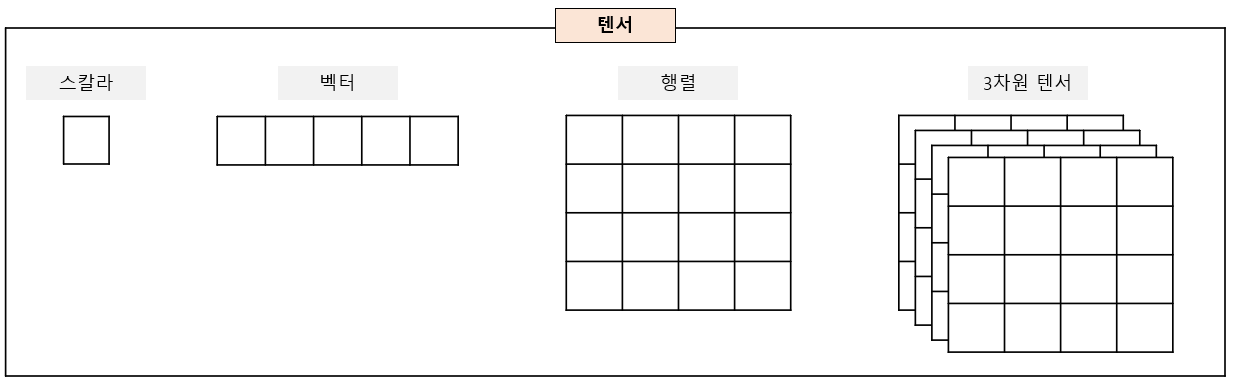

# **2. 텐서**

PyTorch의 텐서(Tensor)는 딥러닝 모델에서 데이터를 다룰 때 사용되는 기본 데이터 구조입니다. 텐서는 다차원 배열로, NumPy의 배열과 비슷하지만, GPU에서 연산을 수행할 수 있다는 점에서 차이가 있습니다. PyTorch의 텐서는 데이터의 표현뿐만 아니라, 자동 미분(autograd) 기능을 제공하여 딥러닝 모델의 학습을 도와줍니다.

In [7]:
data = [
  [1, 2],
  [3, 4]
]
t1 = torch.tensor(data) # 데이터를 텐서로 만들어줌

print(t1)

tensor([[1, 2],
        [3, 4]])


In [8]:
t1 = torch.tensor([5])
t2 = torch.tensor([7])

ndarr1 = (t1 + t2).numpy()
print(ndarr1)
print(type(ndarr1))

result = ndarr1 * 10
t3 = torch.from_numpy(result) # ndarr 전용
print(t3)
print(type(t3))

[12]
<class 'numpy.ndarray'>
tensor([120])
<class 'torch.Tensor'>


In [9]:
t1 = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print(t1[0])
print(t1[:, 0])
print(t1[:, -1])
print(t1[..., -1]) # 앞에 있는 내용을 모두 다 가져오겠다. (차원 상관 없이 다)

tensor([1, 2, 3, 4])
tensor([1, 5, 9])
tensor([ 4,  8, 12])
tensor([ 4,  8, 12])


In [10]:
t1 = torch.tensor([[[1, 2, 3],
                        [4, 5, 6]],
                       [[7, 8, 9],
                        [10, 11, 12]]])

print(t1.shape)
print(t1[..., -1]) # 첫 번째와 두 번째 차원을 유지. 마지막 요소만 선택

torch.Size([2, 2, 3])
tensor([[ 3,  6],
        [ 9, 12]])


# **3. GPU 사용**
GPU (Graphics Processing Unit)는 그래픽 처리 장치로, 주로 이미지 렌더링과 같은 대규모 병렬 계산을 수행하는 데 최적화된 하드웨어입니다. 원래는 그래픽 처리를 위해 설계되었지만, 최근에는 인공지능(AI) 및 딥러닝의 연산 가속기로 널리 사용되고 있습니다. 딥러닝은 수천, 수만 개의 행렬 및 벡터 연산을 필요로 합니다. GPU는 여러 개의 코어를 사용하여 이 연산을 병렬로 처리할 수 있습니다. 따라서 GPU는 딥러닝 에 최적화된 구조를 가지고 있습니다.


Google Colab을 이용하면, 손쉽게 PyTorch를 이용해 GPU를 시작할 수 있습니다.

```
[런타임] - [런타임 유형 변경] - [원하는 GPU, TPU를 선택]
```
- A100 GPU: 대규모 학습과 고성능 컴퓨팅에 최적화되어 있으며, 높은 메모리 용량과 대역폭을 제공합니다.
- L4 GPU: 에너지 효율성이 높고, 추론 작업에 최적화되어 있습니다.
- T4 GPU: 에너지 효율성이 우수하며, 중간 규모의 학습 및 추론 작업에 적합합니다.
- TPU v2-8: 대규모 행렬 연산에 최적화되어 있으며, TensorFlow와의 호환성이 높습니다.
- TPU v5e-1: 중형 및 대규모 학습, 추론에 필요한 비용 효율성과 성능을 제공하며, 최신 TPU 아키텍처를 기반으로 합니다.

In [11]:
data = [
  [1, 2],
  [3, 4]
]

t1 = torch.tensor(data)
print(t1.is_cuda)
# 이 데이터는 GPU로 보낸 다음에 학습 시켜야된다.... 아니면 CPU 쓰는거예요...!

t1 = t1.cuda() # GPU로 옮기기
print(t1.is_cuda)

t1 = t1.cpu() # CPU로 옮기기
print(t1.is_cuda)

False
True
False


In [12]:
t1 = torch.tensor([
    [1, 1],
    [2, 2]
]).cuda()

t2 = torch.tensor([
    [5, 6],
    [7, 8]
])

# print(torch.matmul(t1, t2)) # 오류 발생
print(torch.matmul(t1.cpu(), t2))
print(f"Device: {t1.device}")

tensor([[12, 14],
        [24, 28]])
Device: cuda:0


In [3]:
t1 = torch.tensor([
    [1, 2],
    [3, 4]
])
t2 = torch.tensor([
    [5, 6],
    [7, 8]
])
print(t1 + t2)
print(t1 - t2)
print(t1 * t2)
print(t1 / t2)

tensor([[ 6,  8],
        [10, 12]])
tensor([[-4, -4],
        [-4, -4]])
tensor([[ 5, 12],
        [21, 32]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])


In [4]:
t1 = torch.tensor([
    [1, 2],
    [3, 4]
])
t2 = torch.tensor([
    [5, 6],
    [7, 8]
])

print(t1.matmul(t2))
print(torch.matmul(t1, t2))

tensor([[19, 22],
        [43, 50]])
tensor([[19, 22],
        [43, 50]])


In [5]:
t1 = torch.Tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])
print(t1)
print(t1.mean()) # 전체 원소에 대한 평균
print(t1.mean(dim=0)) # 각 열에 대하여 평균 계산 : 0
print(t1.mean(dim=1)) # 각 행에 대하여 평균 계산 : 1

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
tensor(4.5000)
tensor([3., 4., 5., 6.])
tensor([2.5000, 6.5000])


In [6]:
t1 = torch.Tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])
print(t1)
print(t1.sum()) # 전체 원소에 대한 합계
print(t1.sum(dim=0)) # 각 열에 대하여 합계 계산
print(t1.sum(dim=1)) # 각 행에 대하여 합계 계산

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
tensor(36.)
tensor([ 6.,  8., 10., 12.])
tensor([10., 26.])


In [7]:
t1 = torch.Tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])
print(t1)
print(t1.argmax()) # 전체 원소에 대한 최댓값의 인덱스
print(t1.argmax(dim=0)) # 각 열에 대하여 최댓값의 인덱스 계산
print(t1.argmax(dim=1)) # 각 행에 대하여 최댓값의 인덱스 계산

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
tensor(7)
tensor([1, 1, 1, 1])
tensor([3, 3])


# **5. 텐서의 차원 조작**



In [8]:
t1 = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# dim: 텐서를 이어 붙이기 위한 축
# 0번 축(행)을 기준으로 이어 붙이기
result = torch.cat([t1, t1, t1], dim=0) #연산이 아니기 때문에 0은 행이다.
print(result)

# 1번 축(열)을 기준으로 이어 붙이기
result = torch.cat([t1, t1, t1], dim=1)
print(result)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
tensor([[ 1,  2,  3,  4,  1,  2,  3,  4,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  5,  6,  7,  8,  5,  6,  7,  8],
        [ 9, 10, 11, 12,  9, 10, 11, 12,  9, 10, 11, 12]])


In [9]:
t1 = torch.tensor([2], dtype=torch.int)
t2 = torch.tensor([5.0])

print(t1.dtype)
print(t2.dtype)

# 텐서 t1는 자동으로 float32형으로 형변환 처리
print(t1 + t2)
# 텐서 t2를 int32형으로 형변환하여 덧셈 수행
print(t1 + t2.type(torch.int32))

torch.int32
torch.float32
tensor([7.])
tensor([7], dtype=torch.int32)


In [13]:
# view()는 텐서의 모양을 변경할 때 사용한다.
# 이때, 텐서(tensor)의 순서는 변경되지 않는다.
t1 = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8])
t2 = t1.view(4, 2) # view를 만들려면 일단 숫자가 맞아야 됨.
print(t2)

# t1의 값을 변경하면 t2도 변경
t1[0] = 7
print(t1)
print(t2)
print("t2[0] : ", t2[0])
print("t1[0] : ", t1[0])

# t1의 값을 복사(copy)한 뒤에 변경
t3 = t1.clone().view(4, 2)
t1[0] = 9
print(t3)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
tensor([7, 2, 3, 4, 5, 6, 7, 8])
tensor([[7, 2],
        [3, 4],
        [5, 6],
        [7, 8]])
t2[0] :  tensor([7, 2])
t1[0] :  tensor(7)
tensor([[7, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


In [14]:
t1 = torch.rand((64, 32, 3)) #64행 32열짜리가 3개 있어
print(t1.shape)

t2 = t1.permute(2, 1, 0) # 차원 자체를 교환
# (2번째 축, 1번째 축, 0번째 축)의 형태가 됨
print(t2.shape)

torch.Size([64, 32, 3])
torch.Size([3, 32, 64])


In [15]:
t1 = torch.Tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])
print(t1.shape)

# 첫 번째 축에 차원 추가
t1 = t1.unsqueeze(0)
print(t1)
print(t1.shape)

# 네 번째 축에 차원 추가
t1 = t1.unsqueeze(3)
print(t1)
print(t1.shape)

torch.Size([2, 4])
tensor([[[1., 2., 3., 4.],
         [5., 6., 7., 8.]]])
torch.Size([1, 2, 4])
tensor([[[[1.],
          [2.],
          [3.],
          [4.]],

         [[5.],
          [6.],
          [7.],
          [8.]]]])
torch.Size([1, 2, 4, 1])


In [16]:
# 크기가 1인 차원 제거, squeeze(dim): 특정 차원이 1인 경우에만 차원을 제거
t1 = t1.squeeze()
print(t1)
print(t1.shape)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
torch.Size([2, 4])


# **6. 자동 미분과 기울기**

In [21]:
import torch

x = torch.tensor([3.0, 4.0], requires_grad=True) # 미분 예정
y = torch.tensor([1.0, 2.0], requires_grad=True) # 미분 예정

# requires_grad=True :  이 값들을 나중에 미분할거야~ 라고 선언해주는 것. 기본값이라 안써도 상관없긴 함.

z = x + y # 단순 덧셈 : 6
out = z.mean() # 평균 계산 : 5

# out에 대해서 역으로 계산
# 각각의 입력 값이 이 결과에 얼마나 영향을 줬는지 알려줘!
# 미분값을 자동으로 계산
out.backward()

print("x.grad:", x.grad) # [0.5, 0.5] 평균 계산에서는 각 원소가 결과에 절반 만큼 영향
print("y.grad:", y.grad)
print("z.grad:", z.grad) # z는 계산 결과로 만들어진 중간 변수

x.grad: tensor([0.5000, 0.5000])
y.grad: tensor([0.5000, 0.5000])
z.grad: None


/tmp/ipython-input-21-1747483204.py:18: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print("z.grad:", z.grad) # z는 계산 결과로 만들어진 중간 변수


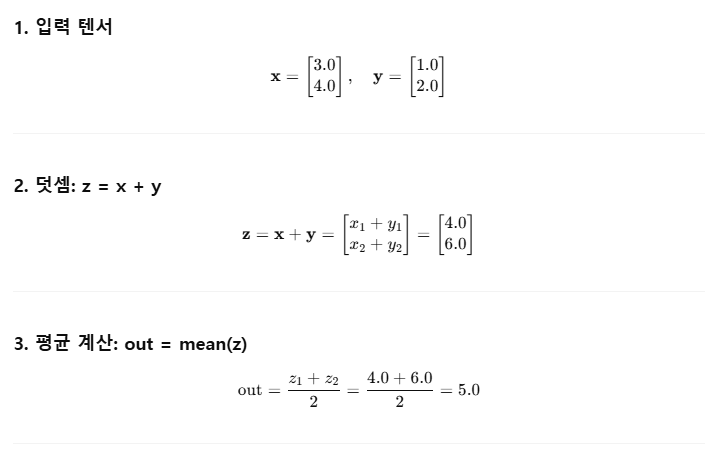

```
x[0] ─┬──► z[0] ───► out
       │      ↑      ↑
y[0] ─┘      │      │
               │      │
x[1] ─┬──► z[1] ───► out
       │
y[1] ─┘
```

z의 각 항목은 x와 y에서 왔고,
out은 z의 평균이니까 z의 각 항목은 결과에 1/2만큼 기여

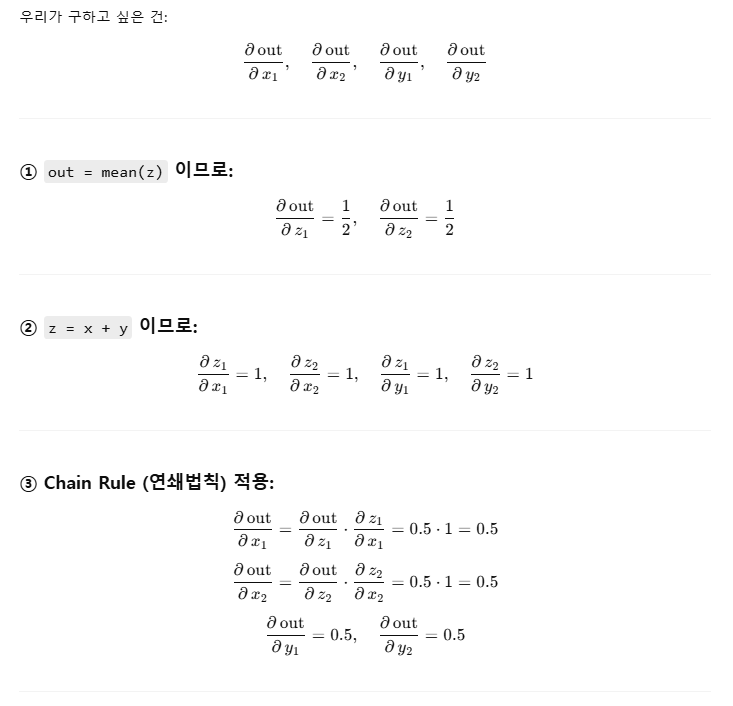

In [22]:
x = torch.tensor(4.0, requires_grad=True)
y = x * 2
z = y + 1
# z = 2x + 1
z.backward() # 편미분

# x가 z에 대해서 얼마나 영향을 줬을까?
# 1은 나중에 더해진 거니까, 2만큼 영향을 준거다.
print(x.grad)

tensor(2.)
